    End to end  Multi-class Dog Breed Classification
    

## 1. Problem
Identifying the breed of a dog given an image of a dog.
When I'm sitting at the cafe and I take a photo of a dof, I want to know what breed of dog it is. 

## 2. Data


The data I'm are using from Kaggle'd dog breed identification competition.

## 3. Evaluation

The evaluation is a file with prediction probabilities for each dog breed of each test image.

## 4. Features

Some information about the data:
* We are dealing with the images (unstructed data) so it's probably best we use deep learning/transfer learning.
* There are 120 breeds of dogs.
* There are around 10,000+ images in the training set
* There are around 10,000+ images in the test set 

In [1]:
#İmport necessary tools
import tensorflow as tf
import tensorflow_hub as hub
print("TF version: ", tf.__version__)
print("TF_hub version: ", hub.__version__)


TF version:  2.10.0
TF_hub version:  0.14.0


In [2]:
## Getting our data ready(turning into tensors)
import pandas as pd
labels_csv = pd.read_csv("dog-breed-identification/labels.csv")
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


<AxesSubplot:>

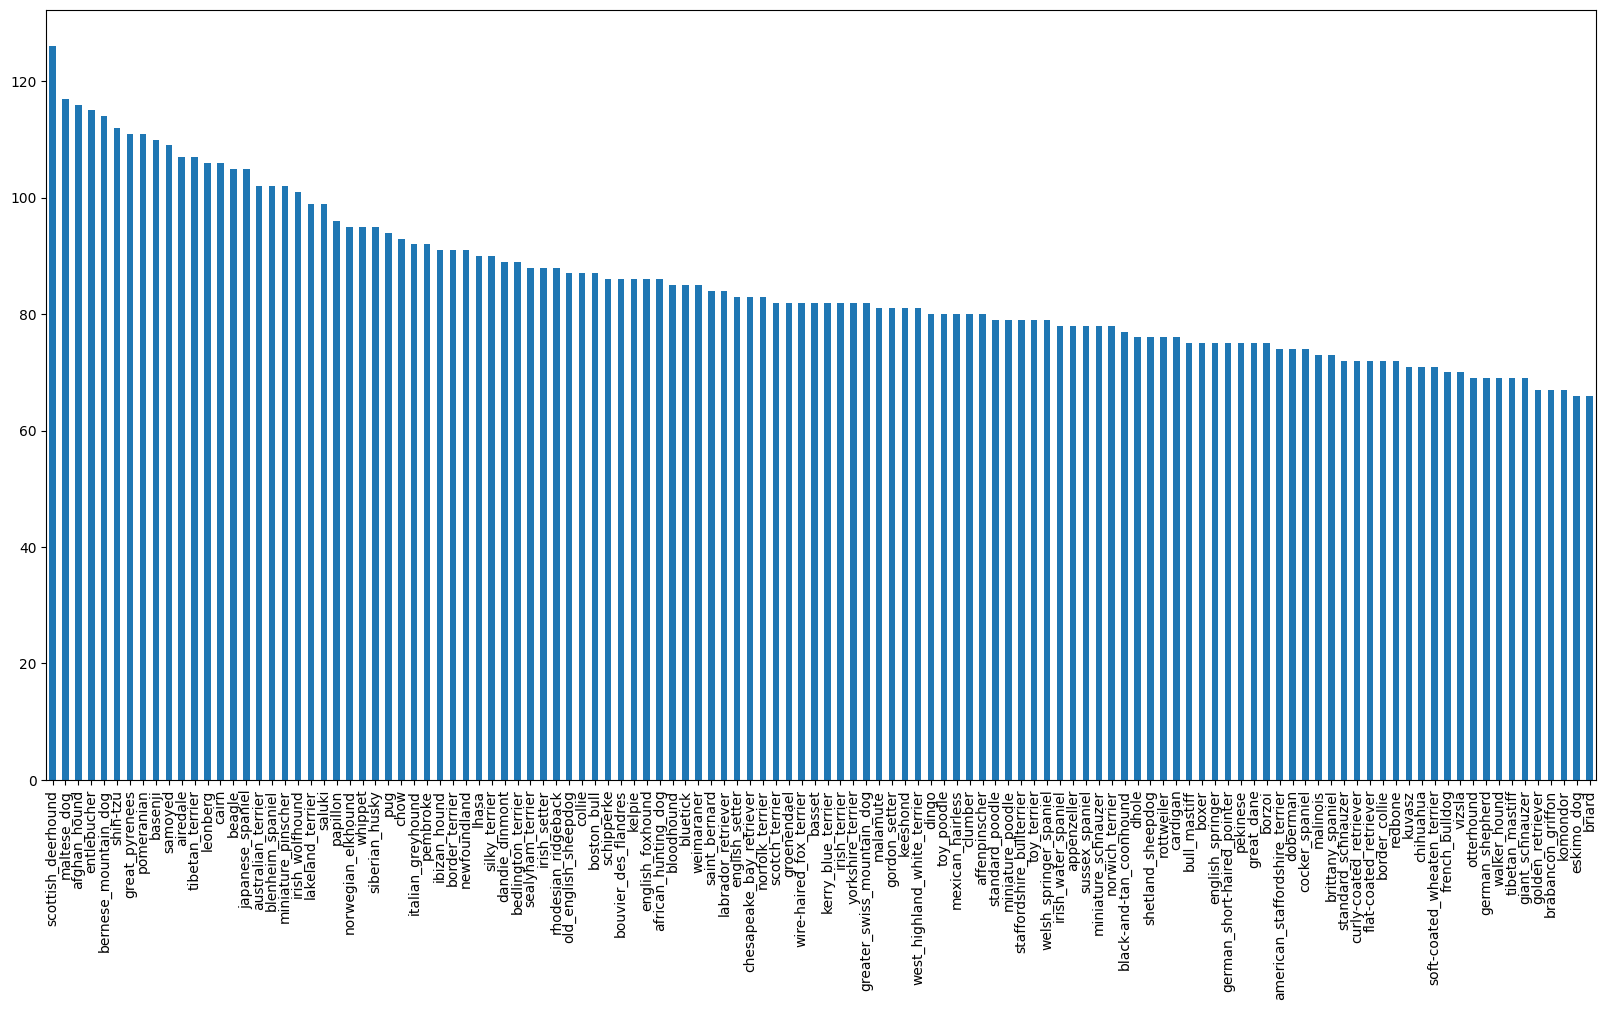

In [3]:
#How many images are there of each breed?
labels_csv["breed"].value_counts().plot.bar(figsize= (20,10))

In [4]:
from IPython.display import Image

In [5]:
filenames = [f"dog-breed-identification/train/{fname}.jpg" for fname in labels_csv["id"]]


In [6]:
import os
os.listdir("dog-breed-identification/train/")[:10]

['000bec180eb18c7604dcecc8fe0dba07.jpg',
 '001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '001cdf01b096e06d78e9e5112d419397.jpg',
 '00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '002211c81b498ef88e1b40b9abf84e1d.jpg',
 '00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '002a283a315af96eaea0e28e7163b21b.jpg',
 '003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '0042188c895a2f14ef64a918ed9c7b64.jpg']

In [7]:
import os
if len(os.listdir("dog-breed-identification/train/")) == len(filenames):
    print("Filenames match actual amount of files!!! Proceed.")
else:
    print("Filenames do not match actual amount of files, check the target directory")

Filenames match actual amount of files!!! Proceed.


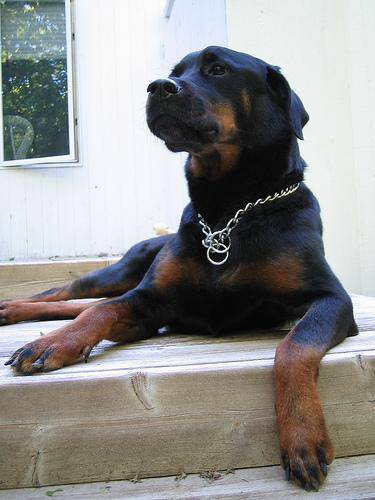

In [8]:
Image(filenames[6988])

In [9]:
import numpy as np
labels = labels_csv["breed"].to_numpy()
#labels = np.array(labels) #does same thing as above

labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [10]:
#See if number of labels matches the number of filenames
if len(labels) == len(filenames):
    print("Number of labels matches the number of filenames")
else:
    print("Number of labels does not match the number of filenames, check data directories!")
    
    

Number of labels matches the number of filenames


In [11]:
#Find the unique label numbers
unique_breeds = np.unique(labels)
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [12]:
#Turn every label into a boolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:3]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [13]:
len(boolean_labels)

10222

In [14]:
#Example : Turning boolean array into integers
print(labels[0]) #original label
print(np.where(unique_breeds == labels[0])) # index where label occurs 
print(boolean_labels[0].argmax()) # index where label occurs in  boolean array
print(boolean_labels[0].astype(int)) #there will be a 1 where the sample label occurs

boston_bull
(array([19], dtype=int64),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


## Creation our own validation set
Since the dataset from Kaggle doesn't have come with a validation set, we're going to create our own.

In [15]:
# Setup X and y variables
X = filenames
y = boolean_labels


In [16]:
X[:5]

['dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg']

In [17]:
y[0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [18]:
len(y)

10222

In [19]:
len(filenames)

10222

We're going to start off experimenting with ~1000 images and increase as needed.

Set number of images to use for experimenting

In [20]:
NUM_IMAGES = 1000 

In [21]:
#Let's split our into train and validation sets
from sklearn.model_selection import train_test_split

#Split them into training and validation of total size NUM_IMAGES
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                y[:NUM_IMAGES],
                                                test_size = .2,
                                                random_state =42) 
len(X_train), len(y_train),len(X_val),len(y_val)

(800, 800, 200, 200)

## Preprocessing Images (turning images into Tensors)

The proccess our images into tensors we're  going to write a function which does a few things:

1.  Take an image filepath as input 
2.  Use TensorFlow to read the file and save it to a variable, 'image'
3.  Turn our 'image' (a jpg) into Tensors
4.  Normalize our image (convertcolor channel values from 0-255 to 0-1).
5.  Resize the 'image' to be a shape of (224, 224)
6.  Return the modified 'image' 


# Convert image to NumPy array

In [22]:
from matplotlib.pyplot import imread 
image = imread(filenames[42])
image.shape

(257, 350, 3)

In [23]:
image.max(), image.min()

(255, 0)

In [24]:
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]]], dtype=uint8)>

In [25]:
# Define image size
IMG_SIZE = 224
 
# Create a function for preprocessing images
def process_image(image_path, img_size = IMG_SIZE):
    #read in an image file
    image = tf.io.read_file(image_path)
    #Turn the jpeg image into numerical Tensor wiht 3 colour channels (Read, Green, Blue)
    image = tf.image.decode_jpeg(image, channels = 3)
    #Convert the colour channel values from 0-255 to 0-1 values
    image = tf.image.convert_image_dtype(image, tf.float32)
    # Resize the image to out desired value (224,224)
    image = tf.image.resize(image, size = [IMG_SIZE, IMG_SIZE])

    return image
    


## Turning our data into batches

Why turn our data into batches?
Let's say you're trying to process 10,000+ images in one go... they all might not fit into memoory.

So that's why we do about 32 (this is batch size) images at a time(you can manually adjust the batch)

In order to use TensorFlow effecitevely we need our data in the form of Tensor tuples which look like this:

In [26]:
# Create a simple function to  return a tuple (image, label)
def get_image_label(image_path, label):
    """
    Takes an image file path name annd the associated label,
    processes the image and returns a typle of(image, label)    
    """
    
    image = process_image(image_path)
    return image , label

In [27]:
(process_image(X[42]), tf.constant(y[42]))


(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117759],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

In [28]:
# Define the batch size, 32 is a good start
BATCH_SIZE = 32

#Create a function to turn data into batches

def create_data_batches(X, y = None, batch_size = BATCH_SIZE, valid_data = False, test_data = False):
    """
    Creates batches of data out of image (x) and label (y) pairs.
    Shuffles the data if it's training data but does't shuffle if it's validation data.
    Also accepts test data as input(no labels) 
    """
    if test_data:
        print("Creating test data batches...")

        data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) #only filepaths (no labels)
        data_batch = data.map(process_image).batch(BATCH_SIZE)
        return data_batch
        
    elif valid_data:
        print("Creating validation data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                                  tf.constant(y))) # labels

        data_batch = data.map(get_image_label).batch(BATCH_SIZE)
        return data_batch
    else:
        print("Creating training data batches...")

        data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                                  tf.constant(y))) # filepath
        #Shuffling pathnames and labels before mapping image processor function is faster than shuffling images                                          
        data = data.shuffle(buffer_size = len(X))

        #Create (image, label) tuples (this also turns the image path into a preprocessed image )
        data = data.map(get_image_label)

        #Turn the training data into batches
        data_batch = data.batch(BATCH_SIZE)

    return data_batch 


In [29]:
#Create training and validationdata batches 
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data = True)


Creating training data batches...


Creating validation data batches...


In [30]:
#Check out the different attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [31]:
## Visualizing Data Batches
import matplotlib.pyplot as plt
def show_25_images(images, labels):

    plt.figure(figsize=(10,10))

    for i in range(25):
        #Create subplots
        ax = plt.subplot(5, 5, i+1)
        #Display an image 
        plt.imshow(images[i])
        # Add the image label
        plt.title(unique_breeds[labels[i].argmax()])
        # Turn the grid lines off
        plt.axis("off")


In [32]:
train_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

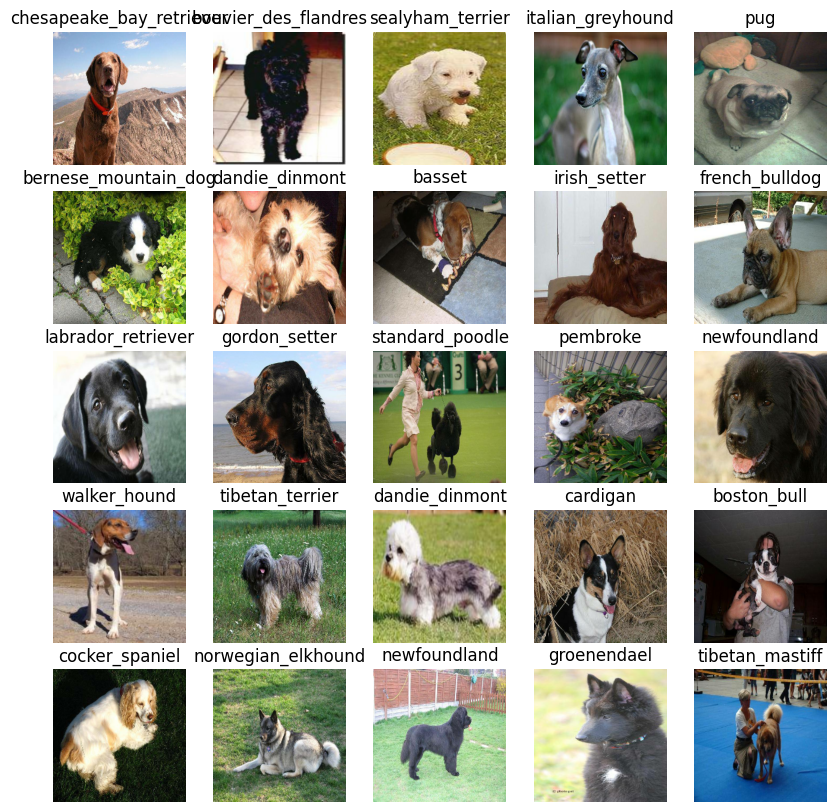

In [33]:
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

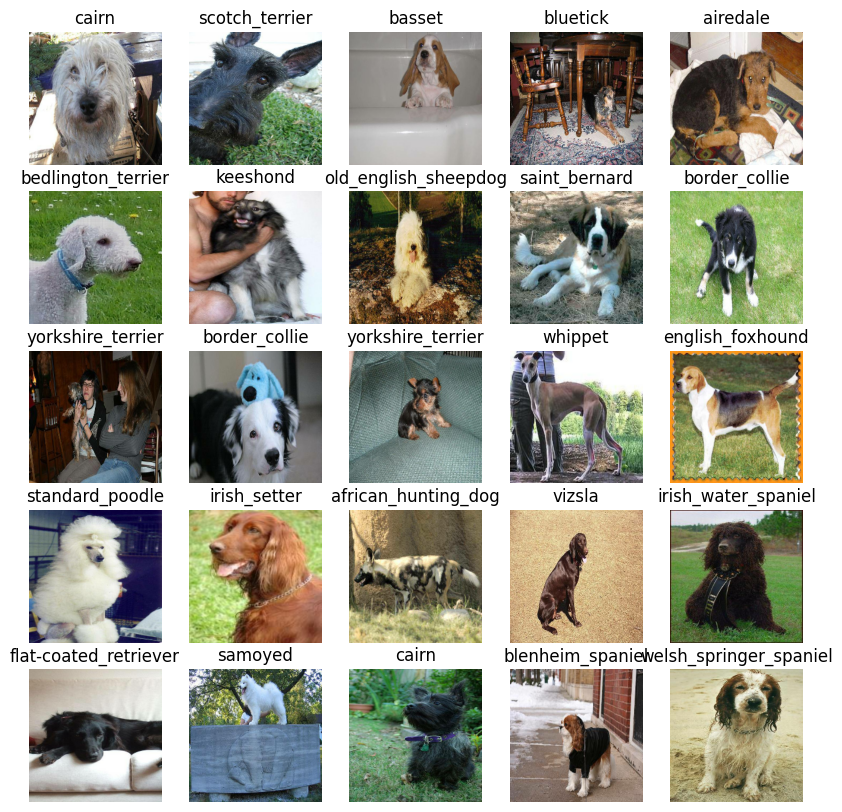

In [34]:
# Now let's visualize our validation set

val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

In [35]:
# Setup input shape to the model
INPUT_SHAPE = [ None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

#Setup output shape of  our model
OUTPUT_SHAPE = len(unique_breeds)

#Setup the url from tensorflow hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"



In [36]:
def create_model(input_shape = INPUT_SHAPE, output_shape = OUTPUT_SHAPE, momdel_url = MODEL_URL):
    print("Building model with : ", MODEL_URL)

    model = tf.keras.Sequential([
        hub.KerasLayer(MODEL_URL),
        tf.keras.layers.Dense(units = OUTPUT_SHAPE,
        activation = "softmax") # layer 2 (output layer)

    ])
#compile the model
    model.compile(
        loss = tf.keras.losses.CategoricalCrossentropy(),
        optimizer = tf.keras.optimizers.Adam(),
        metrics = ["accuracy"]
    )

    model.build(INPUT_SHAPE)
    return model

In [37]:
model = create_model()
model.summary()

Building model with :  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


In [38]:
outputs = np.ones(shape = (1, 1, 1280))
outputs

array([[[1., 1., 1., ..., 1., 1., 1.]]])

In [40]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [41]:
import datetime

#Create a function to build a TensorBoard call back
def create_tensorboard_callback():
    #Create a log diroctory for storing TensorBoard logs
    logdir = os.path.join("logs/",
                          #Make it so the logs get tracked whenever we run an  experiment
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    return tf.keras.callbacks.TensorBoard(logdir)


In [42]:
##Early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

## Training a model(on subset of data)

In [43]:
NUM_EPOCHS = 100

Let's create a function which trains a model

*   Create a model using create_model()
*   Setup a TensorBoard Callback using create_TensorBoard_callback()
*   Call the fit() function on our model passing it the training data, validation data, number of epochs to train for( NUM_EPOCHS) and the callbacks we'd like to use
*   Return the model


In [47]:
def train_model():
    model = create_model()

    tensorboard = create_tensorboard_callback()

    model.fit(x = train_data,
              epochs = NUM_EPOCHS,
              validation_data = val_data,
              validation_freq = 1,
              callbacks = [tensorboard, early_stopping])
    return model

In [48]:
model = train_model()

Building model with :  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5


Epoch 1/100
25/25 [==============================] - 179s 5s/step - loss: 4.4577 - accuracy: 0.1187 - val_loss: 3.3212 - val_accuracy: 0.2400
Epoch 2/100
25/25 [==============================] - 190s 8s/step - loss: 1.6009 - accuracy: 0.6837 - val_loss: 2.0735 - val_accuracy: 0.5300
Epoch 3/100
25/25 [==============================] - 114s 4s/step - loss: 0.5565 - accuracy: 0.9337 - val_loss: 1.6506 - val_accuracy: 0.5850
Epoch 4/100
25/25 [==============================] - 136s 6s/step - loss: 0.2500 - accuracy: 0.9850 - val_loss: 1.4750 - val_accuracy: 0.6200
Epoch 5/100
25/25 [==============================] - 72s 3s/step - loss: 0.1450 - accuracy: 0.9987 - val_loss: 1.3839 - val_accuracy: 0.6450
Epoch 6/100
25/25 [==============================] - 95s 4s/step - loss: 0.0999 - accuracy: 1.0000 - val_loss: 1.3405 - val_accuracy: 0.6700
Epoch 7/100
25/25 [==============================] - 130s 5s/step - loss: 0.0742 - accuracy: 1.0000 - val_loss: 1.3103 - val_accuracy: 0.6650
Epoch 8/

In [49]:
%tensorboard --logdir logs